In [12]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [13]:
# Load the pretrained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [14]:
# Load the image
img_path = '/content/images.jpeg'
image = Image.open(img_path)


In [15]:
# Transform the image to tensor
transformer = T.ToTensor()
img = transformer(image)

In [16]:

# Run the model prediction
with torch.no_grad():
    prediction = model([img])


In [17]:
# Extract boxes, labels, and scores
bboxes, labels, scores = prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']


In [18]:
# Filter boxes with a score above 0.8
threshold = 0.8
high_confidence_indices = [i for i, score in enumerate(scores) if score > threshold]
high_confidence_boxes = bboxes[high_confidence_indices]
high_confidence_labels = labels[high_confidence_indices]
high_confidence_scores = scores[high_confidence_indices]


In [19]:
# Convert the image to OpenCV format (BGR)
cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Font for labels
font = cv2.FONT_HERSHEY_SIMPLEX

In [20]:
# List of COCO dataset class names (subset for brevity, complete list is recommended)
coco_names = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
              "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
              "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
              "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
              "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
              "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
              "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
              "hair drier", "toothbrush"]


In [21]:
# Draw bounding boxes and class labels on the image
for i in range(len(high_confidence_boxes)):
    box = high_confidence_boxes[i].numpy().astype(int)
    label = high_confidence_labels[i].item()
    score = high_confidence_scores[i].item()
    class_name = coco_names[label - 1]  # Labels are 1-indexed in COCO, so subtract 1
    cv2.rectangle(cv_image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    cv2.putText(cv_image, f'{class_name}: {score:.2f}', (box[0], box[1] - 10), font, 0.5, (255, 0, 0), 1)


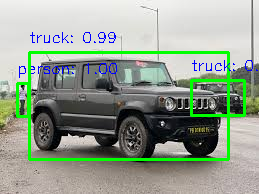

In [22]:
# Display the result
cv2_imshow(cv_image)